Importing The Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np
import datetime
import math
import statsmodels.api as sm
from pylab import rcParams
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras import callbacks

Importing The Dataset

In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%b %d, %Y')
df=pd.read_csv('/content/CrudeOilPrices.csv',parse_dates=['Date'], date_parser=dateparse)
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


(8216, 2)

Handling Missing Data

In [3]:
df.isnull().sum()

Date     0
Price    8
dtype: int64

In [4]:
df['Price']=df['Price'].fillna(method='ffill')

In [5]:
df.isnull().sum()

Date     0
Price    0
dtype: int64

Data Visualization

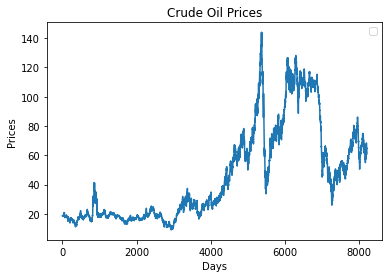

In [6]:
df_plot = df.iloc[:,1:2].values
plt.plot(df_plot)
plt.title('Crude Oil Prices')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.legend()
plt.show()

Creating a dataset with sliding window

In [7]:
train_size=0.8
batch_size=32
train_len=len(df)*train_size
train_set_lengths=[]
for x in range(int(train_len-200),int(train_len)): 
  if(x%batch_size==0):
    train_set_lengths.append(x)
train_set_length=max(train_set_lengths)
train_set_length

6560

In [8]:
timesteps=30
train_1=train_set_length+timesteps*2
train_data_1= df[0:train_1]
training_set=train_data_1.iloc[:,1:2].values
training_set.shape

(6620, 1)

Feature Scaling

In [9]:
minmaxscaler = MinMaxScaler()
scaled_training_set=minmaxscaler.fit_transform(np.float64(training_set))
scaled_training_set

array([[0.07067112],
       [0.0693363 ],
       [0.07007786],
       ...,
       [0.69425287],
       [0.67675195],
       [0.67259918]])

Splitting Data Into Train And Test

In [10]:
X_train=[]
Y_train=[]
for i in range(timesteps, train_set_length+ timesteps): 
    X_train.append(scaled_training_set[i-timesteps:i,0])
    Y_train.append(scaled_training_set[i:i+timesteps,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
Y_train = np.reshape(Y_train, (Y_train.shape[0], Y_train.shape[1], 1))

Initializing The Model, Adding LSTM Layers, Adding Output Layers

In [11]:
input_layer=Input(batch_shape=(batch_size,timesteps,1))
lstm_layer_1=LSTM(8,stateful=True,return_sequences=True)(input_layer)
lstm_layer_2=LSTM(8,stateful=True,return_sequences=True)(lstm_layer_1)
output_layer=Dense(units=1)(lstm_layer_2)
regressor=Model(inputs=input_layer, outputs = output_layer)
regressor.compile(optimizer='adam',loss='mean_squared_error')

Train The Model

In [12]:
earlystopping = callbacks.EarlyStopping(monitor="val_loss",mode="min",patience=5,restore_best_weights=True)
regressor.fit(X_train,Y_train,epochs=25,batch_size=batch_size,callbacks=[earlystopping])

Epoch 1/25
202/205 [============================>.] - ETA: 0s - loss: 0.0361

205/205 [==============================] - 8s 14ms/step - loss: 0.0359
Epoch 2/25
202/205 [============================>.] - ETA: 0s - loss: 0.0121

205/205 [==============================] - 2s 8ms/step - loss: 0.0121
Epoch 3/25
202/205 [============================>.] - ETA: 0s - loss: 0.0082

205/205 [==============================] - 2s 8ms/step - loss: 0.0081
Epoch 4/25
200/205 [============================>.] - ETA: 0s - loss: 0.0064

205/205 [==============================] - 2s 8ms/step - loss: 0.0064
Epoch 5/25
201/205 [============================>.] - ETA: 0s - loss: 0.0051

205/205 [==============================] - 2s 8ms/step - loss: 0.0051
Epoch 6/25
203/205 [============================>.] - ETA: 0s - loss: 0.0044

205/205 [==============================] - 2s 8ms/step - loss: 0.0044
Epoch 7/25
205/205 [==============================] - ETA: 0s - loss: 0.0038

205/205 [==============================] - 2s 8ms/step - loss: 0.0038
Epoch 8/25
200/205 [============================>.] - ETA: 0s - loss: 0.0034

205/205 [==============================] - 2s 8ms/step - loss: 0.0034
Epoch 9/25
200/205 [============================>.] - ETA: 0s - loss: 0.0030

205/205 [==============================] - 2s 8ms/step - loss: 0.0030
Epoch 10/25
202/205 [============================>.] - ETA: 0s - loss: 0.0028

205/205 [==============================] - 2s 8ms/step - loss: 0.0028
Epoch 11/25
204/205 [============================>.] - ETA: 0s - loss: 0.0026

205/205 [==============================] - 2s 8ms/step - loss: 0.0026
Epoch 12/25
202/205 [============================>.] - ETA: 0s - loss: 0.0024

205/205 [==============================] - 2s 8ms/step - loss: 0.0024
Epoch 13/25
201/205 [============================>.] - ETA: 0s - loss: 0.0023

205/205 [==============================] - 2s 8ms/step - loss: 0.0023
Epoch 14/25
204/205 [============================>.] - ETA: 0s - loss: 0.0022

205/205 [==============================] - 2s 8ms/step - loss: 0.0022
Epoch 15/25
203/205 [============================>.] - ETA: 0s - loss: 0.0022

205/205 [==============================] - 2s 8ms/step - loss: 0.0022
Epoch 16/25
202/205 [============================>.] - ETA: 0s - loss: 0.0021

205/205 [==============================] - 2s 8ms/step - loss: 0.0021
Epoch 17/25
203/205 [============================>.] - ETA: 0s - loss: 0.0021

205/205 [==============================] - 2s 8ms/step - loss: 0.0021
Epoch 18/25
203/205 [============================>.] - ETA: 0s - loss: 0.0021

205/205 [==============================] - 2s 8ms/step - loss: 0.0021
Epoch 19/25
201/205 [============================>.] - ETA: 0s - loss: 0.0021

205/205 [==============================] - 2s 8ms/step - loss: 0.0021
Epoch 20/25
200/205 [============================>.] - ETA: 0s - loss: 0.0020

205/205 [==============================] - 2s 8ms/step - loss: 0.0020
Epoch 21/25
203/205 [============================>.] - ETA: 0s - loss: 0.0021

205/205 [==============================] - 2s 8ms/step - loss: 0.0021
Epoch 22/25
205/205 [==============================] - ETA: 0s - loss: 0.0021

205/205 [==============================] - 2s 8ms/step - loss: 0.0021
Epoch 23/25
201/205 [============================>.] - ETA: 0s - loss: 0.0021

205/205 [==============================] - 2s 8ms/step - loss: 0.0021
Epoch 24/25
200/205 [============================>.] - ETA: 0s - loss: 0.0020

205/205 [==============================] - 2s 8ms/step - loss: 0.0020
Epoch 25/25
201/205 [============================>.] - ETA: 0s - loss: 0.0021

205/205 [==============================] - 2s 8ms/step - loss: 0.0020


Save The Model

In [13]:
regressor_json = regressor.to_json()
with open("regressor.json", "w") as json_file:
    json_file.write(regressor_json)
regressor.save_weights("regressor.h5")

Testing The Model

In [14]:
test_length_values=[]
for x in range(len(df)-200,len(df)-timesteps*2): 
  if ((x-train_1)%batch_size==0):
    test_length_values.append(x)
test_set_length=(max(test_length_values))
test_1 = test_set_length + timesteps*2
test_set_len = test_set_length-train_1
test_set_len

1504

In [15]:
df_data_1_test=df[train_1:test_1] 
test_set = df_data_1_test.iloc[:,1:2].values
scaled_test_set=minmaxscaler.fit_transform(np.float64(test_set))
X_test=[]
for i in range(timesteps,test_set_len+timesteps):
    X_test.append(scaled_test_set[i-timesteps:i, 0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
Y_pred=regressor.predict(X_test)
regressor.reset_states()
Y_pred= np.reshape(Y_pred,(Y_pred.shape[0],Y_pred.shape[1]))
Y_pred=minmaxscaler.inverse_transform(Y_pred)

(1504, 30, 1)
47/47 [==============================] - 1s 3ms/step


In [16]:
Y_pred_final=[]
for j in range(0,test_set_len-timesteps):
    Y_pred_final=np.append(Y_pred_final,Y_pred[j,timesteps-1])
Y_pred_final=np.reshape(Y_pred_final,(Y_pred_final.shape[0], 1))

Model Evaluation

In [17]:
print("Mean Squared Error: "+str(math.sqrt(mean_squared_error(test_set[timesteps:len(Y_pred_final)],Y_pred_final[0:len(Y_pred_final) - timesteps]))))
print("Mean Absolute Error: "+str(math.sqrt(mean_absolute_error(test_set[timesteps:len(Y_pred_final)],Y_pred_final[0:len(Y_pred_final) - timesteps]))))

Mean Squared Error: 2.670620641517207
Mean Absolute Error: 1.4968272020655715
